# Lab01: Descenso de Gradiente y Regresion Lineal
Despues de haber entrenado con el tutorial anterior ya debemos estar con algo de conocimiento de python y numpy. 
## Descenso de Gradiente para una función de una sola variable

Considera la función
## $$f(x)=10(x-2)^2+50sin(.25(x-2)^2)$$

La derivada para esa función es
## $$f'(x)=20(x-2)+50cos(.25(x-2)^2)(.5(x-2))$$

Grafiquemos la función primero:

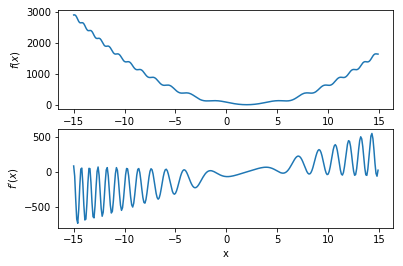

In [17]:

%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np

# no es recommendable importar de esta forma
#from matplotlib.pyplot import *
#from numpy import *

alpha = 10
beta  = 50
def f(x):
    return alpha*(x-2)**2 + beta*np.sin(0.25*(x-2)**2)

def dfdx(x):
    return 2*alpha*(x-2) + beta*np.cos(0.25*(x-2)**2)*(0.5*(x-2))

x = np.arange(-15, 15, .1)
y = f(x)
dy = dfdx(x)


plt.figure()

plt.subplot(2,1,1)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("$f(x)$")

plt.subplot(2,1,2)
plt.plot(x, dy)
plt.xlabel("x")
plt.ylabel("$f'(x)$")
plt.show()



In [0]:
def grad_descent(f, dfdx, init_x, alpha):
    EPS = 1e-3
    prev_x = init_x-2*EPS
    x = init_x
    
    iter = 0
    while abs(x - prev_x) >  EPS:
        prev_x = x
        x -= alpha*dfdx(x)
        
        print ("Iter %d: x = %.2f, f(x) = %.2f"  % (iter, x, f(x)))
        iter += 1
    
    return x

Tratemos de ejecutar el descenso de gradiente a partir de la suposición inicial de 8.

In [19]:
grad_descent(f, dfdx, -10, 0.01)

Iter 0: x = -7.98, f(x) = 986.20
Iter 1: x = -3.55, f(x) = 357.13
Iter 2: x = -2.22, f(x) = 129.62
Iter 3: x = -1.65, f(x) = 123.82
Iter 4: x = -1.82, f(x) = 121.69
Iter 5: x = -1.89, f(x) = 121.40
Iter 6: x = -1.89, f(x) = 121.40


-1.8911180349850074

## Elejir un punto nuevo
Demostremos que podríamos terminar en un mal mínimo local.

In [20]:
grad_descent(f, dfdx, 20, 0.01)

Iter 0: x = 12.90, f(x) = 1139.51
Iter 1: x = 11.04, f(x) = 867.04
Iter 2: x = 9.24, f(x) = 551.08
Iter 3: x = 6.25, f(x) = 131.90
Iter 4: x = 5.60, f(x) = 124.67
Iter 5: x = 5.78, f(x) = 122.05
Iter 6: x = 5.88, f(x) = 121.41
Iter 7: x = 5.89, f(x) = 121.40
Iter 8: x = 5.89, f(x) = 121.40
Iter 9: x = 5.89, f(x) = 121.40


5.891083745200664

# Regresión lineal: 

La última clase estudiamos Regresión lineal. Hoy definiremos un problema de regresión y aplicaremos el Algoritmo de Regresión Lineal como modelo de predicción.

# Supongamos que somos ingenieros consultores en machine learning y nos piden predecir:

Las ventas de un producto (en miles de unidades) en función de los presupuestos de publicidad (en miles de dólares) para TV, radio y periódicos. 

* Queremos encontrar una función para los presupuestos de entrada para TV, radio y periódico predigan las ventas de salida.

* ¿Qué medios contribuyen mayor a las ventas?

* Visualice la relación entre las características y la respuesta usando gráficos de dispersión.


Hoy vamos a hacer un analysis simple
1. Descargar el archivo o leerlo directamente del http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv

2. Análisis y visualización rápida

3. Entrenar modelo de regresión lineal

4. Mostrar los estimadores/coeficientes aprendidos

5. Evaluación del modelo (Vamos a entrar en full detalle despues de arboles de decicion, por ahora solo sera una simple evaluación)


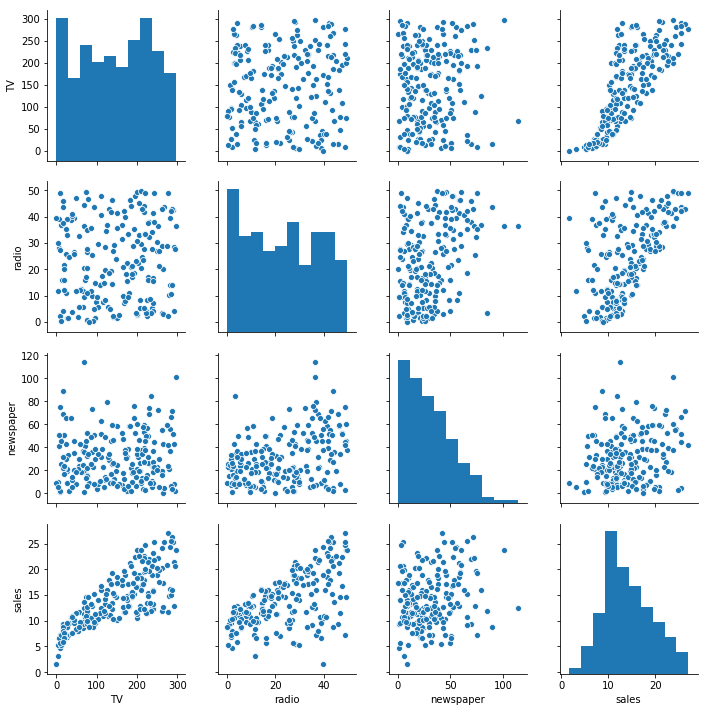

In [21]:
import numpy as np
import pandas as pd
# import model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# import module to calculate model perfomance metrics
import seaborn as sns
from sklearn import metrics

web_data= "http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv"

data = pd.read_csv(web_data, index_col=0)

#sns.pairplot(data, hue='sales', size=2.5);
sns.pairplot(data);


In [22]:
# crear una lista de nombres de funciones
feature_names = ['TV', 'radio', 'newspaper']

# use la lista para seleccionar un subconjunto del DataFrame original
X = data[feature_names]
print (X.head())

# sales
y = data.sales

# Dividir X e Y en juegos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Modelo
linreg = LinearRegression()

# ajustar el modelo a los datos de entrenamiento 
linreg.fit(X_train, y_train)

# Los coeficientes
print('\nCoeficientes:', linreg.coef_)

# hacer predicciones en el conjunto de prueba
y_pred = linreg.predict(X_test)

      TV  radio  newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4

Coeficientes: [0.04656457 0.17915812 0.00345046]


## Métricas de evaluación del modelo para la regresión

Necesitamos métricas de evaluación diseñadas para comparar los valores continuos, aquí se usa el Root Mean Squared Error, claro que hay otros, pero esta es una de las opciones mas simple. Mas adelante vamos a entrar en full detalle despues de arboles de decicion, por ahora solo sera una simple evaluación.

Root Mean Squared Error (https://en.wikipedia.org/wiki/Root-mean-square_deviation) es la raíz cuadrada de la media de los errores al cuadrado (MSE), MSE por sí solo se puede utilizar para la métrica de evaluación. Su formula es

$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_i -\hat{y}_i)^2}$$


In [23]:
# calcular el RMSE de nuestras predicciones
print('RMSE = %.2f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


# Explicación de la varianza: 1 es predicción perfecta
print('Variance score = %.2f' % metrics.r2_score(y_test, y_pred))


RMSE = 1.40
Variance score = 0.92


## Matriz de correlación

Mostrar las distribuciones de unión en pares puede ser abrumador cuando tenemos muchas variables los datos. A veces, podemos trazar la matriz de correlación para cuantificar la relación lineal entre variables. El coeficiente de correlación entre dos variables aleatorias $a$ y $b$ se definen como:

$$\frac{\mathrm{Cov}(\mathrm{a},\mathrm{b})}{\sqrt{\mathrm{Var}(\mathrm{a})\mathrm{Var}(\mathrm{b})}}$$


La varianza "normalizada" es la que captura la relación lineal de dos variables aleatorias, y los valores están limitados al rango $[-1,1]$. La matriz de correlación $\boldsymbol{R}\in\mathbb{R}^{D\times D}$ de un vector aleatorio $x$ es una matriz cuadrada cuyo elemento $R_{i, j}$ denota la correlación entre los atributos $x_i$ y $x_j$. Si consideramos los puntos de datos como i.i.d. muestras de x, entonces podemos tener un estimado $$\hat{\boldsymbol{R}} cuyo elemento

$$\hat{R}_{i,j}=\frac{\Sigma_{s=1}^{N}(x_{i}^{(s)}-\hat{\mu}_{\mathrm{x}_{i}})(x_{j}^{(s)}-\hat{\mu}_{\mathrm{x}_{j}})}{\sqrt{\Sigma_{s=1}^{N}(x_{i}^{(s)}-\hat{\mu}_{\mathrm{x}_{i}})^{2}}\sqrt{\Sigma_{s=1}^{N}(x_{j}^{(s)}-\hat{\mu}_{\mathrm{x}_{j}})^{2}}}=\frac{\hat{\sigma}_{\mathrm{x}_{i},\mathrm{x}_{j}}}{\hat{\sigma}_{\mathrm{x}_{i}}\hat{\sigma}_{\mathrm{x}_{j}}}$$

es una estimación de la correlación (generalmente llamada r de Pearson) entre los atributos $x_i$ y $x_j$.  Ademas normalizamos $z$ para cada punto de los datos tal que

$$z_{i}^{(s)}=\frac{x_{i}^{(s)}-\hat{\mu}_{\mathrm{x}_{i}}}{\hat{\sigma}_{\mathrm{x}_{i}}}$$

para todo $i$. Entonces simplemente tenemos $\hat{\boldsymbol{R}}=\frac{1}{N}\boldsymbol{Z}^\top \boldsymbol{Z}$, donde $Z$ es la matriz de diseño de los puntos de datos normalizados. Podemos trazar $\hat{\boldsymbol{R}}$ de la siguiente manera:

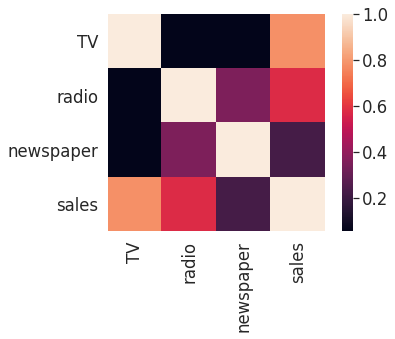

In [24]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Z-normalize data
sc = StandardScaler()
Z = sc.fit_transform(data)
# Estimate the correlation matrix
R = np.dot(Z.T, Z) / data.shape[0]

sns.set(font_scale=1.5)

ticklabels = [s for s in data.columns]

hm = sns.heatmap(R,
            cbar=True,
            square=True,
            yticklabels=ticklabels,
            xticklabels=ticklabels)

plt.show()


# Tarea
La matriz de correlación ofrece una visión más concisa de la relación entre variables. La regresión lineal, suponen que las variables están correlacionadas linealmente con la variable objetivo. Un mapa de calor de correlaciones puede ayudarnos a seleccionar variables que respalden esta suposición. 
## Pregunta
Si queremos predecir la variable "Sale" usando la regresión lineal, que variables deberiamos tomar como importantes y/o no importantes?

## Jugar con los datos
Selecciar las características
      Pregunta  : ¿Cual de los TV, radio, o newspaper mejora la calidad de nuestras predicciones?
      Hipótesis : el periódico no mejora las predicciones del modelo.
      Prueba de hipótesis: Que hacemos para mejorar el RMSE (Root Mean Squared Error).
Tip:
     El error es algo que queremos minimizar, por lo que un número menor para RMSE es mejor. Si quisiéramos realizar cambios y mejoras el modelo, el RMSE debería ser menor si el modelo está mejorando.

In [0]:
## Escribir codigo
##